# PROJECT : DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/augus/Downloads/Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


#### DATA EXPLORATION

In [3]:
# Creating a list of feature names from the data
columns = data.columns
columns_list = columns.to_list()

In [4]:
# Collecting the unique values of each features from the data
unique_value_dict = {}
for column in columns_list:
    unique_values = data[column].unique()
    unique_value_dict[column] = list( unique_values)

In [5]:
# Creating a list of length Unique values are in each feature
unique_value_length = []
for key, value in unique_value_dict.items():
    unique_value_length.append(len(value))

In [6]:
# printing unique values and their lengths 
print('Unique values are in each features: ')
for key, value in unique_value_dict.items():
    print('Feature name : ', key)
    print(f"Unique values in {key} : {value}")
print('\nList of length of unique values in each feature values :')
unique_value_length 

Unique values are in each features: 
Feature name :  Company
Unique values in Company : ['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt']
Feature name :  Age
Unique values in Age : [20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0]
Feature name :  Salary
Unique values in Salary : [nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0]
Feature name :  Place
Unique values in Place : ['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune']
Feature name :  Country
Unique values in Country : ['

[7, 30, 41, 12, 1, 2]

In [7]:
# Statistical analysis of each column
data.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


#### DATA CLEANING

In [8]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
numeric_data = data.select_dtypes('number')
numeric_data = numeric_data[['Age', 'Salary']]

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
iterative_imputer = IterativeImputer()
imputed_numeric = iterative_imputer.fit_transform(numeric_data)
imputed_numeric = pd.DataFrame(imputed_numeric, columns=['Age', 'Salary'])
imputed_numeric[['Age', 'Salary']] = imputed_numeric[['Age', 'Salary']].astype(int)

In [12]:
data['Place'] = data['Place'].fillna(data['Place'].mode()[0])
data[['Age', 'Salary']] = imputed_numeric[['Age', 'Salary']]
data['Company'] = data['Company'].fillna(data['Company'].mode()[0])
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [13]:
data.drop_duplicates()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5312,Chennai,India,0
1,Infosys,30,5312,Mumbai,India,0
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22,8202,Mumbai,India,0
143,TCS,33,9024,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [14]:
data[['Age', 'Salary']].skew()

Age      -0.604581
Salary    0.185058
dtype: float64

In [15]:
data = data.drop(columns='Country')
data

,Company,Age,Salary,Place,Gender
0,TCS,20,5312,Chennai,0
1,Infosys,30,5312,Mumbai,0
2,TCS,35,2300,Calcutta,0
3,Infosys,40,3000,Delhi,0
4,TCS,23,4000,Mumbai,0
...,...,...,...,...,...
143,TCS,33,9024,Calcutta,1
144,Infosys,22,8787,Calcutta,1
145,Infosys,44,4034,Delhi,1
146,TCS,33,5034,Mumbai,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

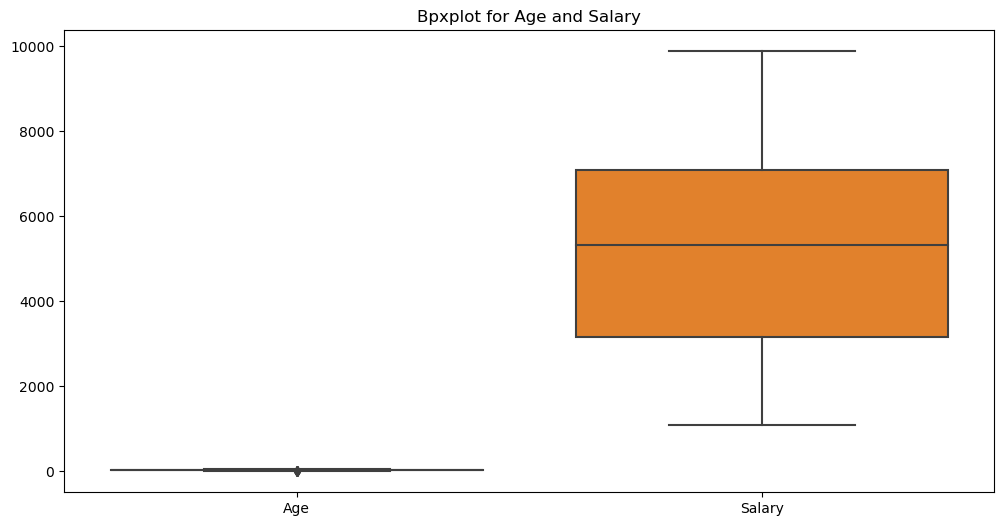

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Age', 'Salary']])
plt.title('Bpxplot for Age and Salary')
plt.show()

In [18]:
import numpy as np

data['Gender'] = data['Gender'].replace(0, 'NaN')

#### DATA ANALYSIS

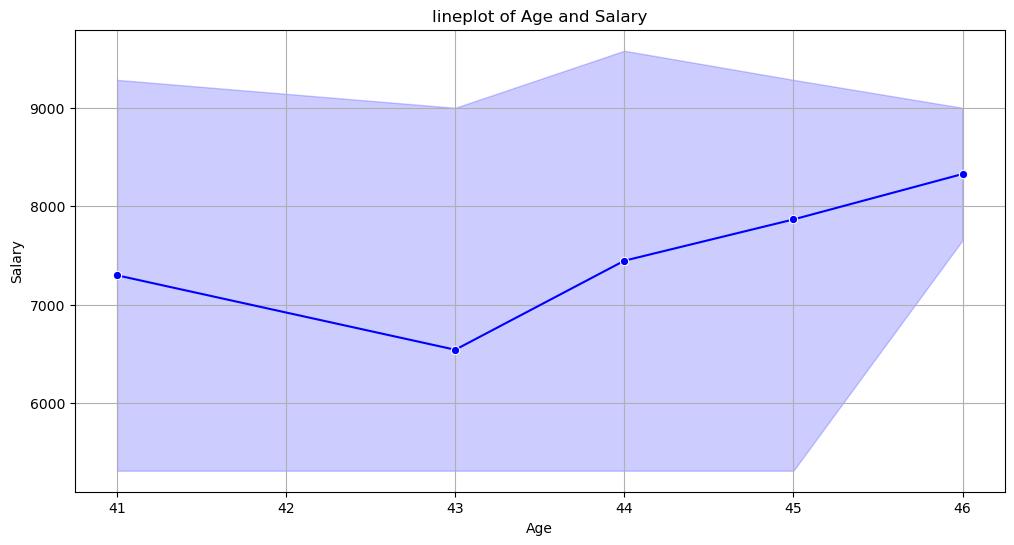

In [19]:
filtered_data = data.loc[(data['Age'] > 40) & (data['Salary'] > 5000)]
filtered_data

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Salary', data=filtered_data, marker= 'o', color='b')
plt.title('lineplot of Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

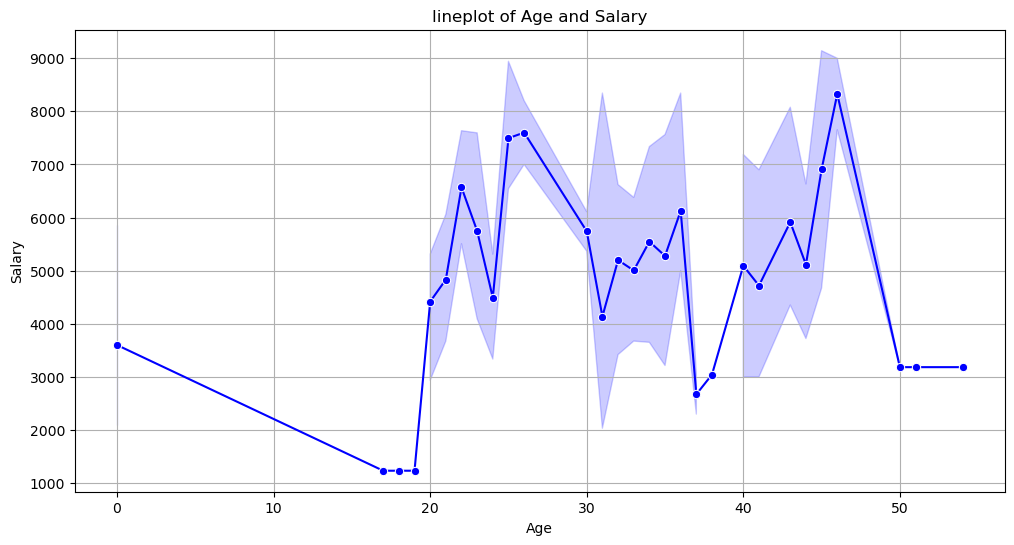

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Salary', data=data, marker= 'o', color='b')
plt.title('lineplot of Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [21]:
place_counts = data['Place'].value_counts().reset_index()
place_counts.columns = ['Place', 'No.of People']
place_counts

,Place,No.of People
0,Mumbai,51
1,Calcutta,33
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


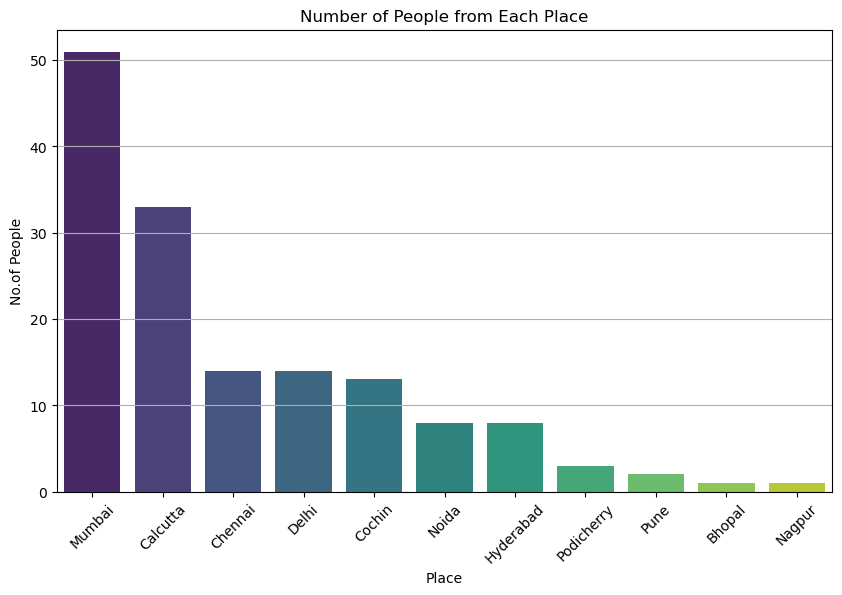

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Place', y='No.of People', data=place_counts, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('No.of People')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Data encoding

In [23]:
# Encoding categorical values into numerical representations
encoded_data_list = ['encoded_company_data', 'encoded_place_data', 'encoded_gender_data']
encoded_data_list = pd.get_dummies(data, columns=['Company', 'Place', 'Gender'], dtype='int')
encoded_data_list = encoded_data_list.astype(int)

In [24]:
# Printing the Encoded values
encoded_company_data = encoded_data_list.filter(like='Company')
encoded_place_data = encoded_data_list.filter(like='Place')
encoded_gender_data = encoded_data_list.filter(like='Gender')

print('Categorical values after Encoding: \n')
print('Company : \n', encoded_company_data)
print('\nPlace : \n', encoded_place_data)
print('\nGender : \n', encoded_gender_data)

Categorical values after Encoding: 

Company : 
      Company_CTS  Company_Congnizant  Company_Infosys  \
0              0                   0                0   
1              0                   0                1   
2              0                   0                0   
3              0                   0                1   
4              0                   0                0   
..           ...                 ...              ...   
143            0                   0                0   
144            0                   0                1   
145            0                   0                1   
146            0                   0                0   
147            0                   0                1   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  
0                          0            1                                  0  
1                          0            0                                  0  
2                          0 

In [25]:
#encoded_data = encoded_data_list.astype(int)
dropped_categoricals = data.drop(columns=['Company', 'Place', 'Gender'])
data_encoded = pd.concat([dropped_categoricals, encoded_data_list], axis=0)

#### FEATURE SCALING

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [27]:
standard_scaled_data = standard_scaler.fit_transform(data_encoded)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=data_encoded.columns)
print('Standard Scaled Data : ', standard_scaled_df)

minmax_scaled_data = minmax_scaler.fit_transform(data_encoded)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=data_encoded.columns)
print('MinMax Scaled Data : ', minmax_scaled_df)

Standard Scaled Data :            Age    Salary  Company_CTS  Company_Congnizant  Company_Infosys  \
0   -1.006232 -0.000167          NaN                 NaN              NaN   
1   -0.041084 -0.000167          NaN                 NaN              NaN   
2    0.441490 -1.283870          NaN                 NaN              NaN   
3    0.924064 -0.985532          NaN                 NaN              NaN   
4   -0.716687 -0.559336          NaN                 NaN              NaN   
..        ...       ...          ...                 ...              ...   
291  0.248460  1.581873    -0.566947           -0.117041        -0.660979   
292 -0.813202  1.480864    -0.566947           -0.117041         1.512907   
293  1.310123 -0.544846    -0.566947           -0.117041         1.512907   
294  0.248460 -0.118650    -0.566947           -0.117041        -0.660979   
295 -0.813202  1.231540    -0.566947           -0.117041         1.512907   

     Company_Infosys Pvt Lmt  Company_TCS  Company_